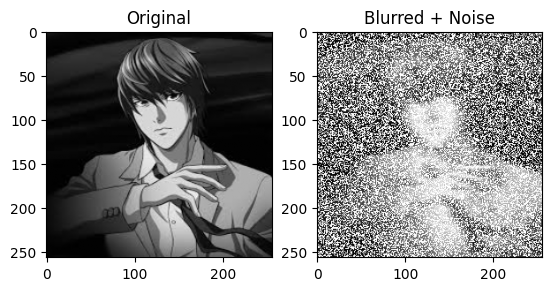

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size-1)/2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    blurred = cv2.filter2D(img, -1, kernel)
    return blurred, kernel

# Load grayscale image
img = cv2.imread('/content/light.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # For simplicity

# Apply blur
blurred_img, psf = add_motion_blur(img)

# Add noise
noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
noisy_blurred = cv2.add(blurred_img, noise)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(noisy_blurred, cmap='gray'), plt.title('Blurred + Noise')
plt.show()


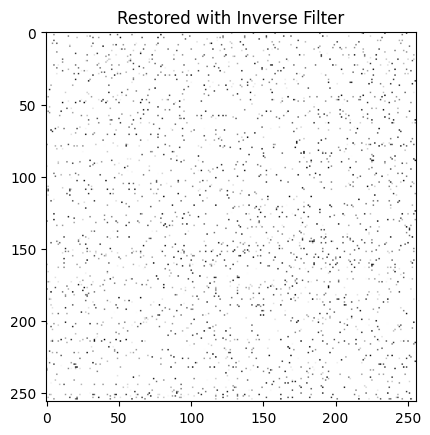

In [ ]:
def inverse_filter(blurred_img, psf):
    # Convert to frequency domain
    G = np.fft.fft2(blurred_img)
    H = np.fft.fft2(psf, s=blurred_img.shape)

    # Avoid division by zero
    H_abs = np.abs(H)
    H[H_abs < 1e-5] = 1e-5

    # Inverse filter: F = G / H
    F = G / H
    f = np.fft.ifft2(F)
    f = np.abs(f)
    f = np.clip(f, 0, 255)
    return f.astype(np.uint8)

restored_inverse = inverse_filter(noisy_blurred, psf)
plt.imshow(restored_inverse, cmap='gray')
plt.title('Restored with Inverse Filter')
plt.show()


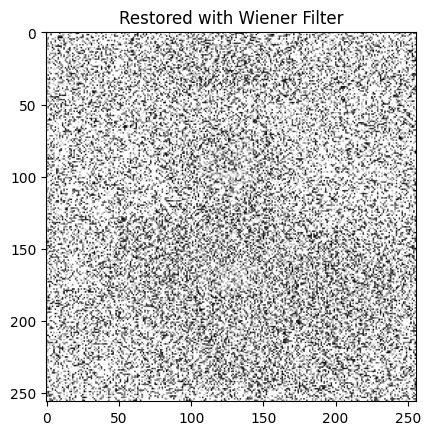

In [ ]:
def wiener_filter(blurred_img, psf, K=0.01):
    G = np.fft.fft2(blurred_img)
    H = np.fft.fft2(psf, s=blurred_img.shape)
    H_conj = np.conj(H)

    # Wiener formula
    Wiener = (H_conj / (np.abs(H)**2 + K)) * G
    f = np.fft.ifft2(Wiener)
    f = np.abs(f)
    f = np.clip(f, 0, 255)
    return f.astype(np.uint8)

restored_wiener = wiener_filter(noisy_blurred, psf, K=0.01)
plt.imshow(restored_wiener, cmap='gray')
plt.title('Restored with Wiener Filter')
plt.show()


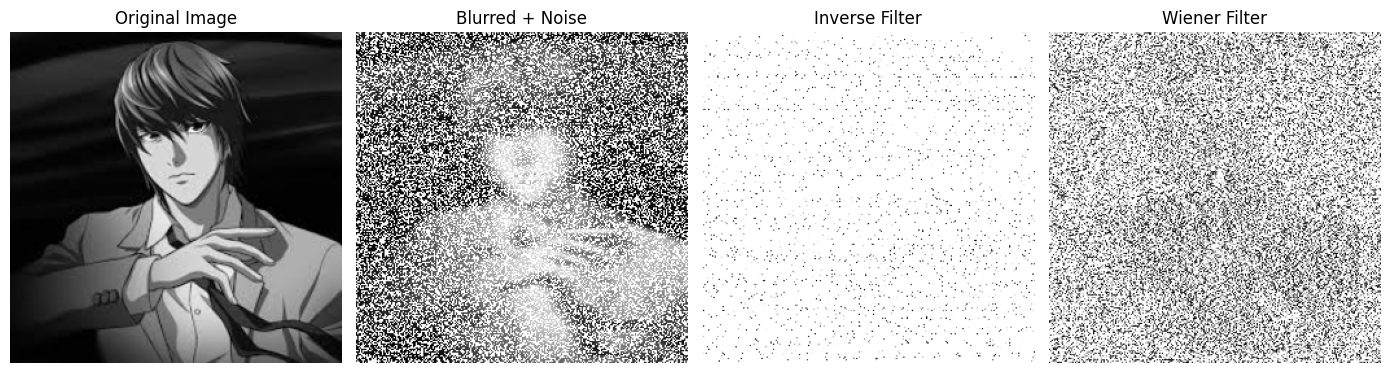

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Image
img = cv2.imread('/content/light.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image
img = cv2.resize(img, (256, 256))

# Step 2: Apply Motion Blur + Add Noise
def add_motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    blurred = cv2.filter2D(img, -1, kernel)
    return blurred, kernel

blurred_img, psf = add_motion_blur(img)
noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
noisy_blurred = cv2.add(blurred_img, noise)

# Step 3: Inverse Filter
def inverse_filter(blurred_img, psf):
    G = np.fft.fft2(blurred_img)
    H = np.fft.fft2(psf, s=blurred_img.shape)
    H[np.abs(H) < 1e-5] = 1e-5
    F = G / H
    f = np.fft.ifft2(F)
    f = np.abs(f)
    f = np.clip(f, 0, 255)
    return f.astype(np.uint8)

restored_inverse = inverse_filter(noisy_blurred, psf)

# Step 4: Wiener Filter
def wiener_filter(blurred_img, psf, K=0.01):
    G = np.fft.fft2(blurred_img)
    H = np.fft.fft2(psf, s=blurred_img.shape)
    H_conj = np.conj(H)
    Wiener = (H_conj / (np.abs(H)**2 + K)) * G
    f = np.fft.ifft2(Wiener)
    f = np.abs(f)
    f = np.clip(f, 0, 255)
    return f.astype(np.uint8)

restored_wiener = wiener_filter(noisy_blurred, psf, K=0.01)

# Step 5: Display All Versions
titles = ['Original Image', 'Blurred + Noise', 'Inverse Filter', 'Wiener Filter']
images = [img, noisy_blurred, restored_inverse, restored_wiener]

plt.figure(figsize=(14, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


✅ Restored images saved as 'restored_inverse.png' and 'restored_wiener.png'


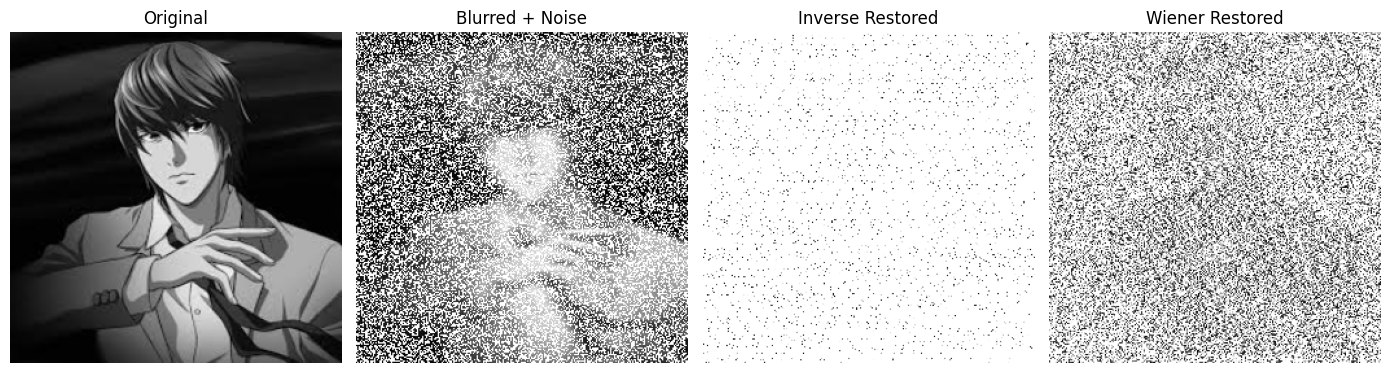

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load image (grayscale)
img = cv2.imread('/content/light.jpg', cv2.IMREAD_GRAYSCALE)  # Change this to your image path
img = cv2.resize(img, (256, 256))  # Resize for simplicity

# 2. Apply motion blur and noise
def add_motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    blurred = cv2.filter2D(img, -1, kernel)
    return blurred, kernel

blurred_img, psf = add_motion_blur(img)
noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
noisy_blurred = cv2.add(blurred_img, noise)

# 3. Inverse Filter
def inverse_filter(blurred_img, psf):
    G = np.fft.fft2(blurred_img)
    H = np.fft.fft2(psf, s=blurred_img.shape)
    H[np.abs(H) < 1e-5] = 1e-5
    F = G / H
    f = np.fft.ifft2(F)
    f = np.abs(f)
    f = np.clip(f, 0, 255)
    return f.astype(np.uint8)

restored_inverse = inverse_filter(noisy_blurred, psf)

# 4. Wiener Filter
def wiener_filter(blurred_img, psf, K=0.01):
    G = np.fft.fft2(blurred_img)
    H = np.fft.fft2(psf, s=blurred_img.shape)
    H_conj = np.conj(H)
    Wiener = (H_conj / (np.abs(H)**2 + K)) * G
    f = np.fft.ifft2(Wiener)
    f = np.abs(f)
    f = np.clip(f, 0, 255)
    return f.astype(np.uint8)

restored_wiener = wiener_filter(noisy_blurred, psf, K=0.01)

# 5. Save the restored images
cv2.imwrite('restored_inverse.png', restored_inverse)
cv2.imwrite('restored_wiener.png', restored_wiener)

print("✅ Restored images saved as 'restored_inverse.png' and 'restored_wiener.png'")

# 6. (Optional) Display for comparison
titles = ['Original', 'Blurred + Noise', 'Inverse Restored', 'Wiener Restored']
images = [img, noisy_blurred, restored_inverse, restored_wiener]

plt.figure(figsize=(14, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


✅ Restored color images saved.


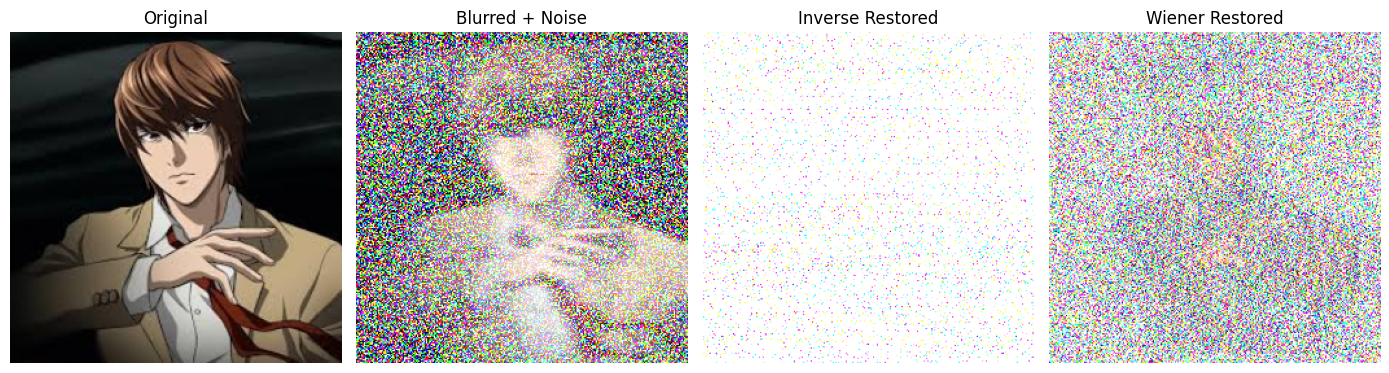

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a color image
img = cv2.imread('/content/light.jpg')  # Replace with your own image path
img = cv2.resize(img, (256, 256))

# Step 2: Create Motion Blur Kernel
def add_motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    blurred = cv2.filter2D(img, -1, kernel)
    return blurred, kernel

blurred_color, psf = add_motion_blur(img)

# Add noise to simulate degradation
noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
noisy_blurred_color = cv2.add(blurred_color, noise)

# Step 3: Channel-wise Inverse Filter
def inverse_filter_color(img_color, psf):
    restored_channels = []
    for i in range(3):  # B, G, R
        G = np.fft.fft2(img_color[:, :, i])
        H = np.fft.fft2(psf, s=G.shape)
        H[np.abs(H) < 1e-5] = 1e-5  # Avoid divide-by-zero
        F = G / H
        f = np.fft.ifft2(F)
        f = np.abs(f)
        f = np.clip(f, 0, 255)
        restored_channels.append(f.astype(np.uint8))
    return cv2.merge(restored_channels)

restored_inverse_color = inverse_filter_color(noisy_blurred_color, psf)

# Step 4: Channel-wise Wiener Filter
def wiener_filter_color(img_color, psf, K=0.01):
    restored_channels = []
    for i in range(3):  # B, G, R
        G = np.fft.fft2(img_color[:, :, i])
        H = np.fft.fft2(psf, s=G.shape)
        H_conj = np.conj(H)
        Wiener = (H_conj / (np.abs(H)**2 + K)) * G
        f = np.fft.ifft2(Wiener)
        f = np.abs(f)
        f = np.clip(f, 0, 255)
        restored_channels.append(f.astype(np.uint8))
    return cv2.merge(restored_channels)

restored_wiener_color = wiener_filter_color(noisy_blurred_color, psf, K=0.01)

# Step 5: Save Results
cv2.imwrite('restored_inverse_color.png', restored_inverse_color)
cv2.imwrite('restored_wiener_color.png', restored_wiener_color)
print("✅ Restored color images saved.")

# Step 6: Display Everything
titles = ['Original', 'Blurred + Noise', 'Inverse Restored', 'Wiener Restored']
images = [img[:, :, ::-1], noisy_blurred_color[:, :, ::-1], restored_inverse_color[:, :, ::-1], restored_wiener_color[:, :, ::-1]]
# (we flip BGR to RGB with [:, :, ::-1] for correct display in matplotlib)

plt.figure(figsize=(14, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


K in Wiener filter controls noise sensitivity. Try different values like 0.001, 0.05, 0.1 for different images.

You can apply more advanced PSFs (like Gaussian or real motion blur) too.

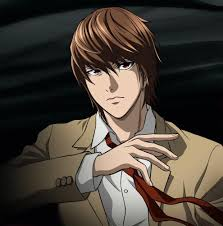

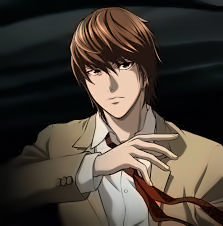

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load noisy image
img = cv2.imread('/content/light.jpg')

# Apply denoising
denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(denoised) # Use cv2_imshow instead of cv2.imshow


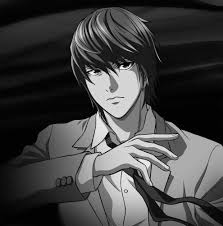

In [ ]:
# prompt: load img and generate its grayscale mas

# Assuming 'img' is already loaded as a color image (BGR)
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Convert the color image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image (optional)
cv2_imshow(gray_img)


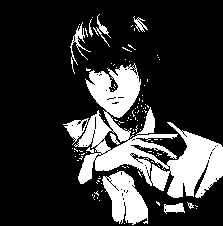

In [ ]:

# Set the threshold value
threshold_value = 127  # Example value, adjust as needed

# Apply thresholding to create a binary mask
_, binary_mask = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)

# Display the binary mask
cv2_imshow(binary_mask)


In [ ]:
# prompt: save binarymask

# Save the binary mask
cv2.imwrite('binary_mask.png', binary_mask)
print("Binary mask saved as binary_mask.png")


Binary mask saved as binary_mask.png


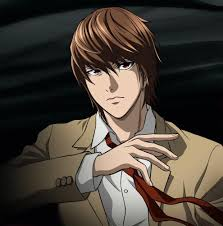

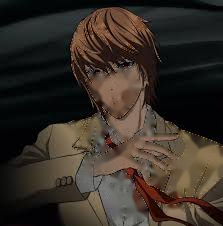

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Load image and mask (white = areas to inpaint)
img = cv2.imread('/content/light.jpg')
mask = cv2.imread('/content/binary_mask.png', 0)  # Grayscale mask

# Inpaint using Telea or Navier-Stokes method
restored = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Use cv2_imshow instead of cv2.imshow for display in Colab
cv2_imshow(img)
cv2_imshow(restored)
